<center><h1 style="font-size:50px; font-family: 'ALGERIAN'; letter-spacing: 0.1em; background-color: RGB(128,0,128);"> <br> Statistiques Exploratoires Spatiales (avec Python) <br> </h1></center>
<center><h3 style="font-size:25px; font-family: 'Calisto MT'; letter-spacing: 0.1em; background-color: RGB(51,165,182);"> Réalisé par le Groupe 3 </h3></center>
ENSAE 2024 : ISE1 CL

<center><h2 style="font-size:28px; font-family: 'Calisto MT'; letter-spacing: 0.1em;"> TP2  </h2></center>

__________________________________________________________________________________________

# Importation des fichiers

In [8]:
#importation des libraries

import rasterio
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import os
import numpy as np
import pandas as pd
# Définition de notre work directory
directory='C:/Users/DELL/Documents/ISEP3_2025/Stats_spatiale/Statistique-Exploratoire-Spatiale/TP/TP2'
os.chdir(directory)

In [12]:
# Importatation du shapefile contenant les divisions administratives
shapefile = 'cmr_admbnda_adm3_inc_20180104.shp'

# Importation des .tiff
tiff_files = [
    'Malaria/202406_Global_Pf_Parasite_Rate_CMR_{}.tiff'.format(i)
    for i in range(2000, 2023)
]

<h2 style="text-align:center; background-color:RGB(105,40,182);font-size:45px;font-family:Algerian; font-color:RGB(255,255,255)">  <br>Section 1 : Calculs statistiques et visualisation des données vecteur <br> </h2>

In [23]:
# Charger le shapefile avec geopandas
gdf = gpd.read_file(shapefile) # Level 3

# Vérifier et changer la projection utilisée

In [36]:
# Vérifier le système de coordonnées actuel
print("Système de coordonnées actuel :", gdf.crs)

Système de coordonnées actuel : EPSG:4326


_

In [6]:
# Reprojeter vers un autre système de coordonnées (par exemple, EPSG:3857)
# convertir de WGS 84 (EPSG:4326) à Mercator (EPSG:3857)


Nouveau système de coordonnées : EPSG:3857


### gdf_reprojete = gdf.to_crs(epsg=3857)

# Nombre de géométries et centroïdes

In [62]:
# Connaitre le nombre de géométries
shapefile0 =  gpd.read_file('cmr_admbnda_adm0_inc_20180104.shp')
shapefile1 =  gpd.read_file('cmr_admbnda_adm1_inc_20180104.shp')
shapefile2 =  gpd.read_file('cmr_admbnda_adm2_inc_20180104.shp')
shapefile3 =  gpd.read_file('cmr_admbnda_adm3_inc_20180104.shp')

print(f"Il y a {shapefile0.shape[0]} géométrie (le pays).")
print(f"Il y a {shapefile1.shape[0]} régions.")
print(f"Il y a {shapefile2.shape[0]} départements.")
print(f"Il y a {shapefile3.shape[0]} arrondissements.")

Il y a 1 géométrie (le pays).
Il y a 10 régions.
Il y a 58 départements.
Il y a 360 arrondissements.


In [32]:
# Visualiser la base
gdf

Shape_Leng  Shape_Area ADM3_EN      ADM3_FR   ADM3_PCODE ADM3_REF  \
0      1.833385    0.138089    None  Abong-Mbang  CM003002001     None   
1      0.652297    0.020600    None     Afanloum  CM002005001     None   
2      1.633150    0.090047    None          Ako  CM007003001     None   
3      0.979868    0.054025    None      Akoeman  CM002010001     None   
4      2.125174    0.157089    None       Akom 2  CM009003001     None   
..          ...         ...     ...          ...          ...      ...   
355    2.782502    0.135079    None       Yingui  CM005002004     None   
356    4.908883    1.045269    None    Yokadouma  CM003001004     None   
357    7.181442    1.280271    None         Yoko  CM002004005     None   
358    1.735753    0.091473    None         Zina  CM004002010     None   
359    1.728243    0.088414    None      Zoetele  CM009001008     None   

    ADM3ALT1EN ADM3ALT2EN ADM3ALT1FR ADM3ALT2FR  ...     ADM1_EN  \
0         None       None       None       None  ...        East   
1         None       None       None       None  ...      Centre   
2         None       None       None       None  ...  North-West   
3         None       None       None       None  ...      Centre   
4         None       None       None       None  ...       South   
..         ...        ...        ...        ...  ...         ...   
355       None       None       None       None  ...    Littoral   
356       None       None       None       None  ...        East   
357       None       None       None       None  ...      Centre   
358       None       None       None       None  ...   Far-North   
359       None       None       None       None  ...       South   

          ADM1_FR ADM1_PCODE   ADM0_EN        ADM0_FR ADM0_PCODE       date  \
0             Est      CM003  Cameroon  Cameroun (le)         CM 2018-12-17   
1          Centre      CM002  Cameroon  Cameroun (le)         CM 2018-12-17   
2      Nord-Ouest      CM007  Cameroon  Cameroun (le)         CM 2018-12-17   
3          Centre      CM002  Cameroon  Cameroun (le)         CM 2018-12-17   
4             Sud      CM009  Cameroon  Cameroun (le)         CM 2018-12-17   
..            ...        ...       ...            ...        ...        ...   
355      Littoral      CM005  Cameroon  Cameroun (le)         CM 2018-12-17   
356           Est      CM003  Cameroon  Cameroun (le)         CM 2018-12-17   
357        Centre      CM002  Cameroon  Cameroun (le)         CM 2018-12-17   
358  Extrême-Nord      CM004  Cameroon  Cameroun (le)         CM 2018-12-17   
359           Sud      CM009  Cameroon  Cameroun (le)         CM 2018-12-17   

       validOn     validTo                                           geometry  
0   2019-01-04  0000/00/00  POLYGON ((12.97725 4.01685, 12.98532 4.01856, ...  
1   2019-01-04  0000/00/00  POLYGON ((12.10679 4.10127, 12.10038 4.09702, ...  
2   2019-01-04  0000/00/00  POLYGON ((10.81914 6.84861, 10.81696 6.8479, 1...  
3   2019-01-04  0000/00/00  POLYGON ((11.64515 3.37503, 11.65412 3.37073, ...  
4   2019-01-04  0000/00/00  POLYGON ((10.26431 2.59458, 10.262 2.6008, 10....  
..         ...         ...                                                ...  
355 2019-01-04  0000/00/00  POLYGON ((10.36017 4.75777, 10.3607 4.76042, 1...  
356 2019-01-04  0000/00/00  POLYGON ((16.0737 2.70936, 16.06016 2.71222, 1...  
357 2019-01-04  0000/00/00  POLYGON ((11.94463 4.63021, 11.94385 4.63084, ...  
358 2019-01-04  0000/00/00  POLYGON ((15.04867 10.99912, 15.04329 10.99945...  
359 2019-01-04  0000/00/00  POLYGON ((11.69255 3.08611, 11.69575 3.09178, ...  

[360 rows x 23 columns]

In [48]:
# Voyons la variable geometry
pd.concat([gdf.geom_type, gdf['geometry']], axis=1)

0                                           geometry
0    Polygon  POLYGON ((12.97725 4.01685, 12.98532 4.01856, ...
1    Polygon  POLYGON ((12.10679 4.10127, 12.10038 4.09702, ...
2    Polygon  POLYGON ((10.81914 6.84861, 10.81696 6.8479, 1...
3    Polygon  POLYGON ((11.64515 3.37503, 11.65412 3.37073, ...
4    Polygon  POLYGON ((10.26431 2.59458, 10.262 2.6008, 10....
..       ...                                                ...
355  Polygon  POLYGON ((10.36017 4.75777, 10.3607 4.76042, 1...
356  Polygon  POLYGON ((16.0737 2.70936, 16.06016 2.71222, 1...
357  Polygon  POLYGON ((11.94463 4.63021, 11.94385 4.63084, ...
358  Polygon  POLYGON ((15.04867 10.99912, 15.04329 10.99945...
359  Polygon  POLYGON ((11.69255 3.08611, 11.69575 3.09178, ...

[360 rows x 2 columns]

In [43]:
print(f"Coordonnées du polygone : {list(gdf.loc[0, 'geometry'].exterior.coords)}")

Coordonnées du polygone : [(12.977251600000045, 4.016847400000074), (12.985319700000048, 4.018559800000048), (12.989954600000033, 4.021642100000065), (12.995619400000066, 4.023183300000028), (12.99530180000005, 4.027421400000037), (13.00079500000004, 4.034613300000046), (13.012639600000057, 4.0388942000000725), (13.017077100000051, 4.039108300000066), (13.022581600000024, 4.04075030000007), (13.028775800000062, 4.038038000000029), (13.037358900000072, 4.047284700000034), (13.046431200000029, 4.046462800000029), (13.052293400000053, 4.041291500000057), (13.060507400000063, 4.039622000000065), (13.067717200000061, 4.04098330000005), (13.070463800000027, 4.041325800000038), (13.07492700000006, 4.045606600000042), (13.080935100000033, 4.045606600000042), (13.087655700000028, 4.043003800000065), (13.09466800000007, 4.0370534000000475), (13.103594400000077, 4.028491600000052), (13.109113300000047, 4.022969200000034), (13.11529310000003, 4.015263400000038), (13.118014000000073, 4.014963800000

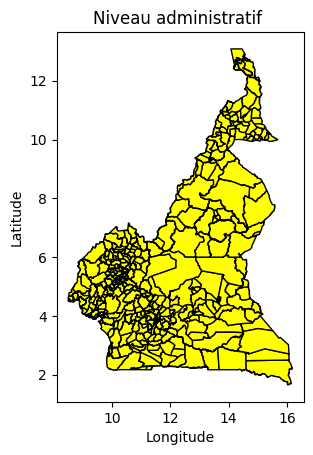

In [44]:
# Visualisation les géométries
gdf.plot(edgecolor='black', facecolor='yellow')
plt.title('Niveau administratif ')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

## Calcul des centroïdes

In [47]:
# Vérifier si le système de coordonnées est géographique
if gdf.crs.is_geographic:
    # Reprojection vers le système UTM Zone 32N (EPSG:32632) pour le Cameroun
    gdf_projected = gdf.to_crs(epsg=32632)

    # Calcul des centroides dans le système projeté
    gdf_projected['centroid'] = gdf_projected['geometry'].centroid

    # Reprojection des centroides vers le système d'origine si nécessaire
    gdf['centroid'] = gdf_projected['centroid'].to_crs(gdf.crs)
else:
    # Calcul direct si les données sont déjà dans un système projeté
    gdf['centroid'] = gdf['geometry'].centroid

# Afficher les centroides
pd.concat([gdf['ADM3_FR'], gdf['centroid']], axis=1)

ADM3_FR                   centroid
0    Abong-Mbang   POINT (13.25154 3.86623)
1       Afanloum    POINT (12.0577 4.14222)
2            Ako   POINT (10.69096 6.85805)
3        Akoeman   POINT (11.57693 3.25809)
4         Akom 2   POINT (10.44288 2.82296)
..           ...                        ...
355       Yingui   POINT (10.34325 4.44023)
356    Yokadouma   POINT (15.15653 3.12026)
357         Yoko   POINT (12.23354 5.45413)
358         Zina  POINT (14.95089 11.19369)
359      Zoetele   POINT (11.88508 3.26977)

[360 rows x 2 columns]

# Périmètre et aire

In [58]:
#" On calcule le périmètre, en mètres
gdf['length']= round(gdf_projected['geometry'].length, 3)

# On calcule la surface en kilomètres carré
gdf['area'] = round(gdf_projected.geometry.area/pow(10,6), 3)

pd.concat([gdf['ADM3_FR'], gdf['length'], gdf['area']], axis=1)

ADM3_FR      length       area
0    Abong-Mbang  203787.208   1704.025
1       Afanloum   72342.054    253.448
2            Ako  180576.841   1100.749
3        Akoeman  108727.565    664.767
4         Akom 2  235676.945   1931.028
..           ...         ...        ...
355       Yingui  308191.611   1657.415
356    Yokadouma  547737.120  12987.807
357         Yoko  795982.590  15727.767
358         Zina  191701.723   1115.819
359      Zoetele  191764.366   1088.476

[360 rows x 3 columns]

## Avec le niveau à

In [61]:
shapefile0 =shapefile0.to_crs(epsg=32632)
shapefile0['length']= shapefile0.length
shapefile0['area'] = shapefile0.geometry.area
pd.concat([shapefile0['length'], shapefile0['area']/pow(10,6)], axis=1)

length           area
0  5.685033e+06  468595.329173

<h2 style="text-align:center; background-color:RGB(105,40,182);font-size:45px;font-family:Algerian; font-color:RGB(255,255,255)"> <br> Section 2 : Au sujet des rasters <br> </h2>

<h2 style="text-align:center; background-color:RGB(51,165,182);font-size:45px;font-family:Algerian"> Lecture des métadonnées </h2>

In [3]:
# Prenons un tii.file
tiff_file='Malaria/202406_Global_Pf_Parasite_Rate_CMR_2020.tiff'

In [15]:
# Lire le raster
with rasterio.open(tiff_file) as src:
    # Afficher les informations du raster
    print(f"Nombre de bandes : {src.count}")
    print(f"Dimensions (hauteur, largeur) : {src.height}, {src.width}")
    print(f"Type de données : {src.dtypes}")
    print(f"Système de projection : {src.crs}")
    print(f"Transformation affine : {src.transform}")
    print(f"Valeurs manquantes : {src.nodata}")
    print(f"Etendue (coordonnées des bords) : {src.bounds}\n")

    # Ou encore : affichage des métadonnées du .tiff
    print(src.meta)
        
  # Lecture des informations de transformation pour projeter correctement les données
    transform = src.transform

    # Valeur manquante 
    nodata=src.nodata
    
    # Lire la première bande et la 2e en dataframe
    bande1 =pd.DataFrame(src.read(1))
    bande2 =pd.DataFrame(src.read(2))

Nombre de bandes : 2
Dimensions (hauteur, largeur) : 274, 185
Type de données : ('float32', 'float32')
Système de projection : EPSG:4326
Transformation affine : | 0.04, 0.00, 8.50|
| 0.00,-0.04, 13.10|
| 0.00, 0.00, 1.00|
Valeurs manquantes : -9999.0
Etendue (coordonnées des bords) : BoundingBox(left=8.5, bottom=1.6865568380414455, right=16.208333333333332, top=13.098846349248129)

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 185, 'height': 274, 'count': 2, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.041666666666666664, 0.0, 8.5,
       0.0, -0.04165069164673972, 13.098846349248129)}


In [122]:
print(f"Il y a {sum (bande1 == nodata)} valeurs manquantes.")
missingp = 100*(sum(bande1 == nodata))/(bande1.shape[0]*bande1.shape[1])
print(f"Il y a {round(missingp, 2)} % de valeurs manquantes.")

Il y a 17020 valeurs manquantes.
Il y a 33.58 % de valeurs manquantes.


In [36]:
bande1

0       1       2       3       4       5       6       7       8    \
0   -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
1   -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
2   -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
3   -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
4   -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
269 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
270 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
271 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
272 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
273 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   

        9    ...          175          176          177          178  \
0   -9999.0  ... -9999.000000 -9999.000000 -9999.000000 -9999.000000   
1   -9999.0  ... -9999.000000 -9999.000000 -9999.000000 -9999.000000   
2   -9999.0  ... -9999.000000 -9999.000000 -9999.000000 -9999.000000   
3   -9999.0  ... -9999.000000 -9999.000000 -9999.000000 -9999.000000   
4   -9999.0  ... -9999.000000 -9999.000000 -9999.000000 -9999.000000   
..      ...  ...          ...          ...          ...          ...   
269 -9999.0  ...     0.401045     0.430943     0.445385     0.418086   
270 -9999.0  ...     0.381615     0.329743     0.413193     0.462514   
271 -9999.0  ... -9999.000000 -9999.000000     0.320072     0.360221   
272 -9999.0  ... -9999.000000 -9999.000000 -9999.000000 -9999.000000   
273 -9999.0  ... -9999.000000 -9999.000000 -9999.000000 -9999.000000   

             179          180          181          182     183     184  
0   -9999.000000 -9999.000000 -9999.000000 -9999.000000 -9999.0 -9999.0  
1   -9999.000000 -9999.000000 -9999.000000 -9999.000000 -9999.0 -9999.0  
2   -9999.000000 -9999.000000 -9999.000000 -9999.000000 -9999.0 -9999.0  
3   -9999.000000 -9999.000000 -9999.000000 -9999.000000 -9999.0 -9999.0  
4   -9999.000000 -9999.000000 -9999.000000 -9999.000000 -9999.0 -9999.0  
..           ...          ...          ...          ...     ...     ...  
269     0.447065     0.445593     0.433140 -9999.000000 -9999.0 -9999.0  
270     0.451325     0.454219     0.439848     0.366381 -9999.0 -9999.0  
271     0.409254     0.385563     0.444992     0.438074 -9999.0 -9999.0  
272 -9999.000000 -9999.000000 -9999.000000 -9999.000000 -9999.0 -9999.0  
273 -9999.000000 -9999.000000 -9999.000000 -9999.000000 -9999.0 -9999.0  

[274 rows x 185 columns]

In [21]:
bande2

0       1       2       3       4       5       6       7       8    \
0   -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
1   -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
2   -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
3   -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
4   -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
269 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
270 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
271 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
272 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
273 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   

        9    ...     175     176     177     178     179     180     181  \
0   -9999.0  ... -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
1   -9999.0  ... -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
2   -9999.0  ... -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
3   -9999.0  ... -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
4   -9999.0  ... -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
..      ...  ...     ...     ...     ...     ...     ...     ...     ...   
269 -9999.0  ... -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
270 -9999.0  ... -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
271 -9999.0  ... -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
272 -9999.0  ... -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
273 -9999.0  ... -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   

        182     183     184  
0   -9999.0 -9999.0 -9999.0  
1   -9999.0 -9999.0 -9999.0  
2   -9999.0 -9999.0 -9999.0  
3   -9999.0 -9999.0 -9999.0  
4   -9999.0 -9999.0 -9999.0  
..      ...     ...     ...  
269 -9999.0 -9999.0 -9999.0  
270 -9999.0 -9999.0 -9999.0  
271 -9999.0 -9999.0 -9999.0  
272 -9999.0 -9999.0 -9999.0  
273 -9999.0 -9999.0 -9999.0  

[274 rows x 185 columns]

<h2 style="text-align:center; background-color:RGB(51,165,182);font-size:45px;font-family:Algerian"> Un point sur...</h2>

<h3 style="text-align:center; background-color:RGB(255, 165, 0);font-size:40px;font-family:Algerian"> L'extent ou étendue</h3>

________________________

La transformation affine est une fonction mathématique utilisée en géomatique pour relier les coordonnées de l'espace image d'un raster (c'est-à-dire les pixels) aux coordonnées géographiques ou projetées sur le terrain (comme les coordonnées en mètres ou en degrés de latitude/longitude). Elle définit comment les pixels du raster sont positionnés dans l'espace géographique.
Composantes de la transformation affine.


\[
\begin{bmatrix} x \\ y \\ 1 \end{bmatrix} =
\begin{bmatrix} a & b & c \\ d & e & f \\ 0 & 0 & 1 \end{bmatrix}
\begin{bmatrix} \text{colonne} \\ \text{ligne} \\ 1 \end{bmatrix}
\]

- x et y sont les coordonnées géographiques du point.
- colonne et ligne sont les coordonnées en pixels dans le raster.
- a, b, c, d, e, et f sont les paramètres de la transformation affine.
Signification des paramètres
Dans le cas d'une transformation affine 2D pour les rasters, les paramètres ont les significations suivantes :
1.	a : La taille du pixel dans la direction x (longitude, ou coordonnée horizontale).
2.	b : La rotation dans la direction y (influence sur l'axe x).
3.	c : La coordonnée x de l'origine du coin supérieur gauche du raster.
4.	d : La rotation dans la direction x (influence sur l'axe y).
5.	e : La taille du pixel dans la direction y (latitude, ou coordonnée verticale), souvent négative car les coordonnées y diminuent du haut vers le bas.
6.	f: La coordonnée y de l'origine du coin supérieur gauche du raster.



___________________________

**# transform = src.transform**

In [63]:
print(transform)
print(src.bounds)

| 0.04, 0.00, 8.50|
| 0.00,-0.04, 13.10|
| 0.00, 0.00, 1.00|
BoundingBox(left=8.5, bottom=1.6865568380414455, right=16.208333333333332, top=13.098846349248129)


<h3 style="text-align:center; background-color:RGB(255, 165, 0);font-size:40px;font-family:Algerian"> Les pixels</h3>

**Un pixel (abréviation de "picture element")** est la plus petite unité discrète d'une image numérique, souvent représentée sous forme de carré, qui compose une image. Chaque pixel contient une valeur de couleur ou d'intensité lumineuse dans les images en niveaux de gris. Dans le contexte géospatial, un pixel représente une zone géographique précise sur le terrain, et la taille d'un pixel indique la superficie couverte par ce pixel, déterminant ainsi la résolution spatiale de l'image. Plus les pixels sont petits, plus la résolution est élevée et plus les détails sont fins.

### Taille des pixels

In [ ]:


# Calcul de la taille des pixels
pixel_size_x = transform[0]  # Résolution X (généralement en mètres ou degrés)
pixel_size_y = -transform[4]  # Résolution Y (le signe négatif permet d'avoir une taille positive)

# Affichage de la taille des pixels
print(f"Taille des pixels en X (longitude) : {pixel_size_x} degrés")
print(f"Taille des pixels en Y (latitude) : {pixel_size_y} degrés")

# Chaque pixel représente une zone sur le terrain
print(f"Chaque pixel représente une zone de {pixel_size_x} x {pixel_size_y}  degrés sur le terrain.")

<h2 style="text-align:center; background-color:RGB(51,165,182);font-size:45px;font-family:Algerian"> Visualisation </h2>

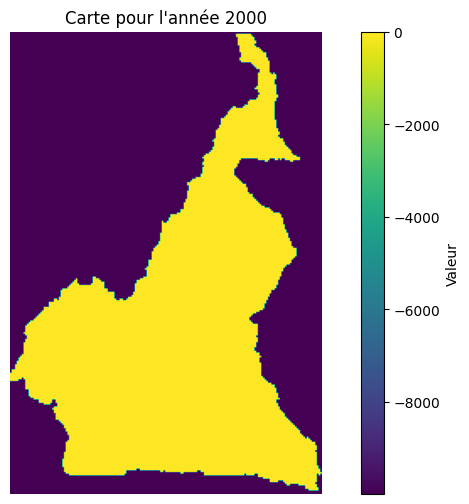

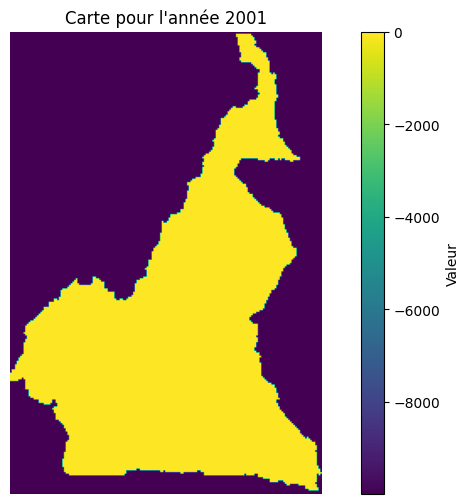

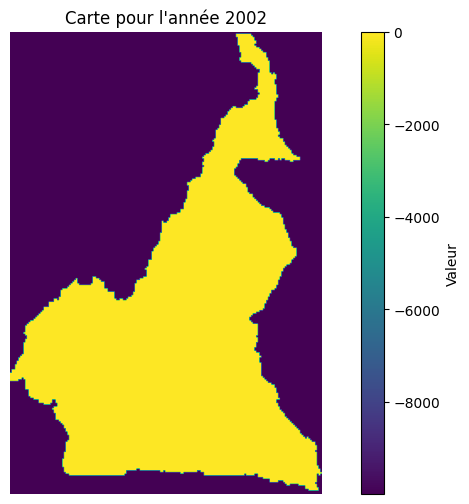

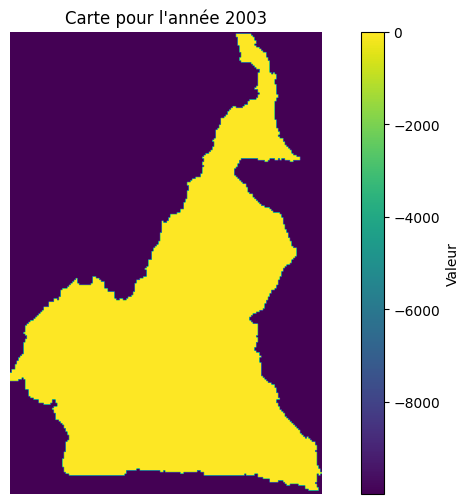

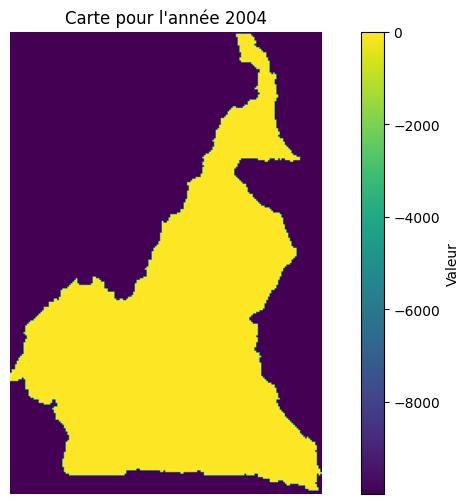

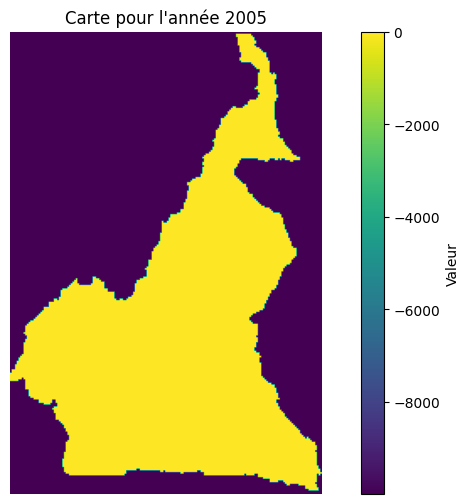

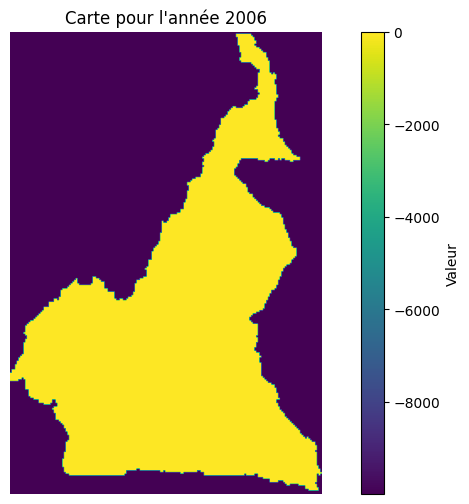

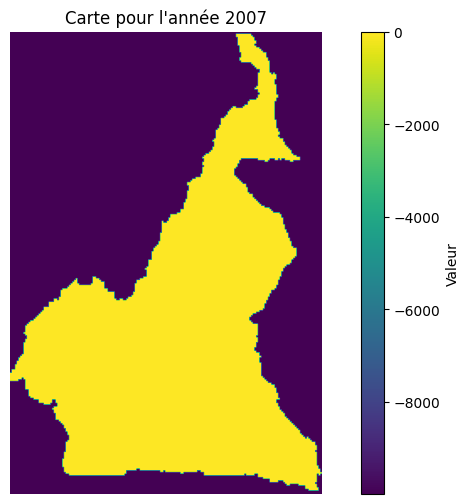

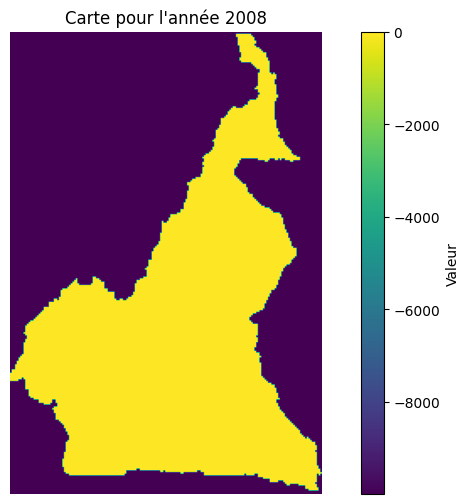

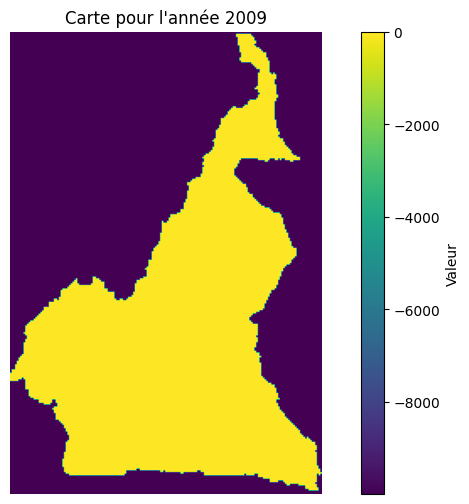

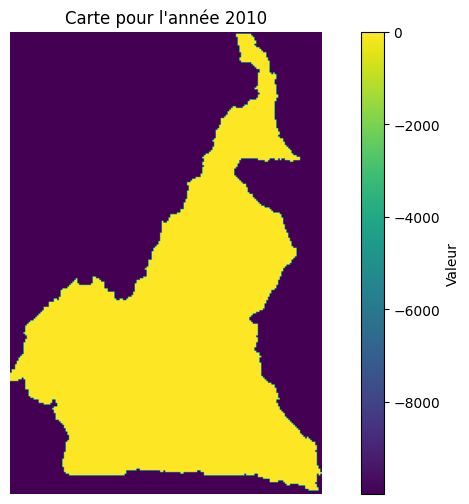

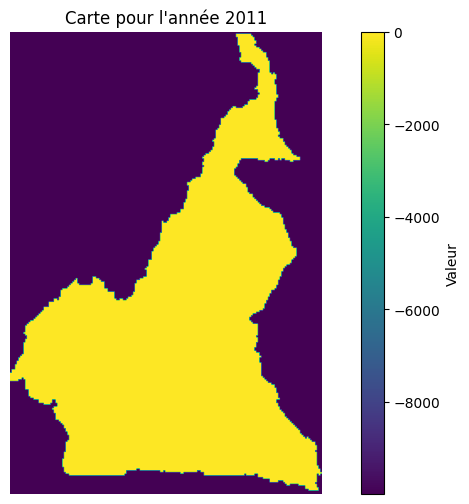

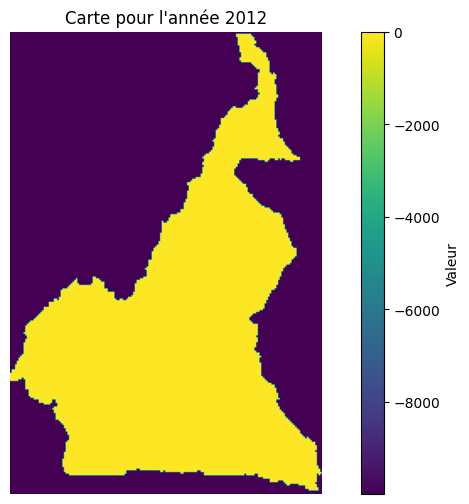

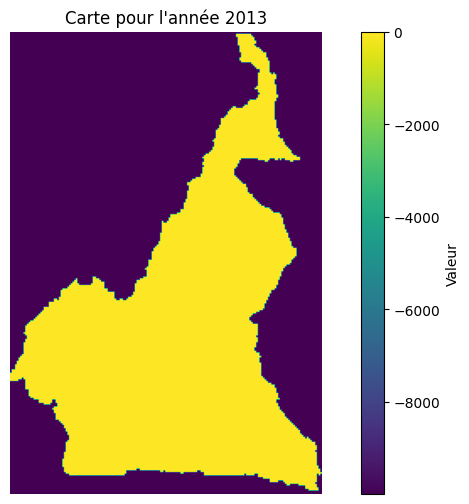

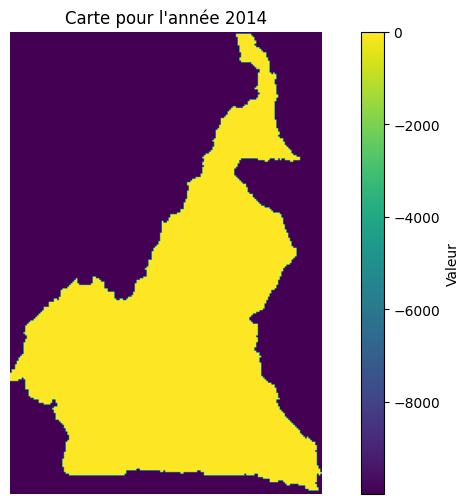

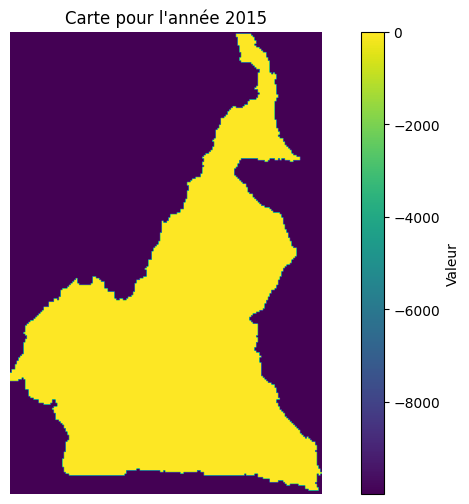

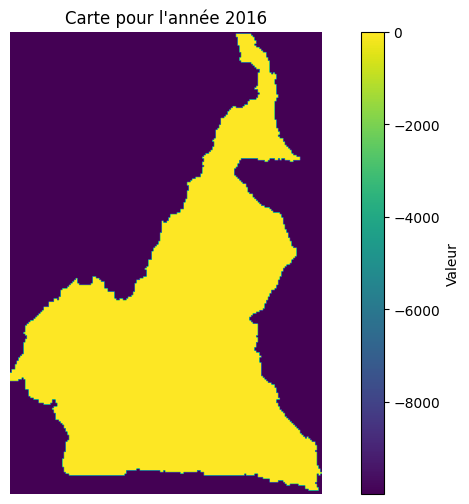

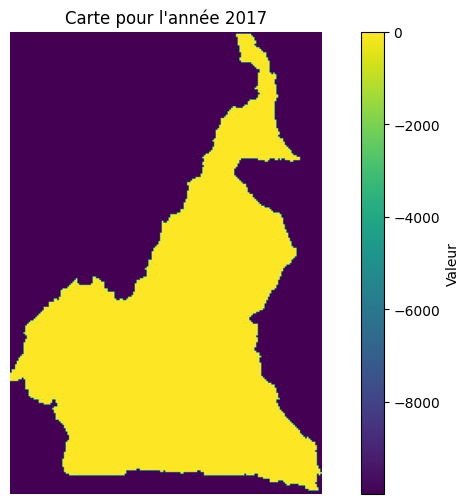

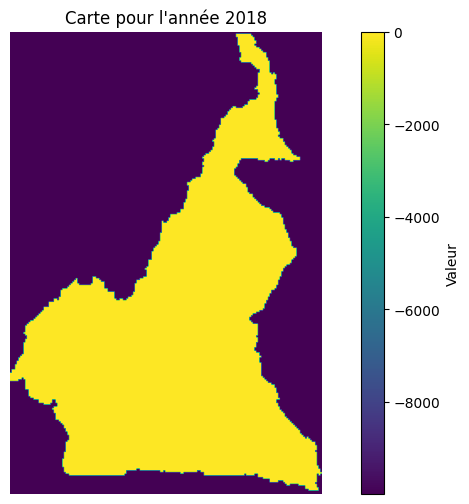

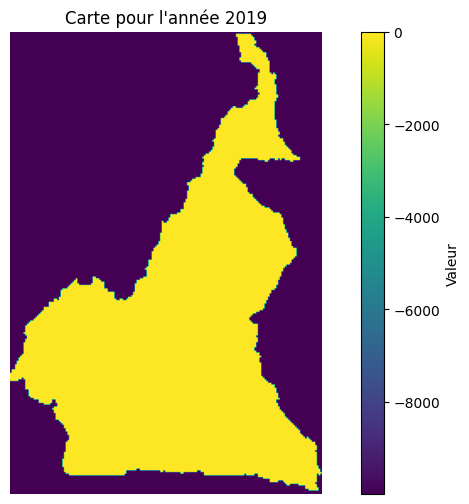

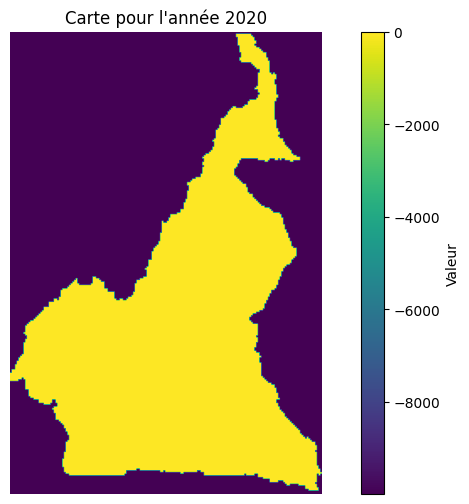

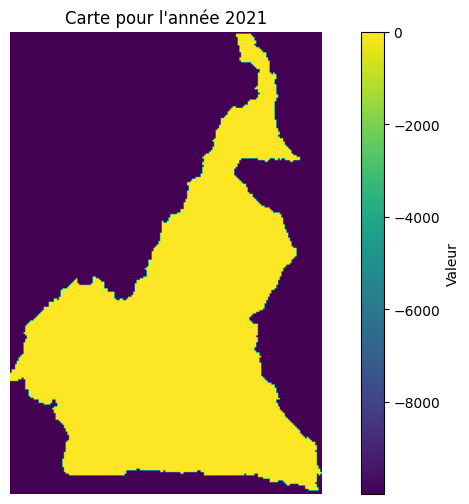

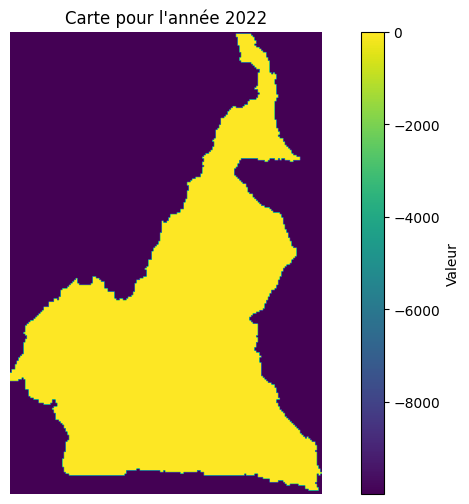

In [95]:
# Fonction pour visualiser les rasters avec masque
for i, file in enumerate(tiff_files, start=2000):
    with rasterio.open(file) as src:
            image = src.read(1)
            
            plt.figure(figsize=(10, 6))
            plt.imshow(image, cmap='viridis')
            plt.colorbar(label='Valeur')
            plt.title("Carte pour l'année {}".format(i))
            plt.axis('off')  # Masquer les axes
            plt.show()


### Enlevons les valeurs maquantes pour mieux visualiser

In [13]:
# Fonction pour visualiser les rasters avec masque
def visualiser_rasters(tiff_files):

    for i, file in enumerate(tiff_files, start=2000):
        with rasterio.open(file) as src:
            image = src.read(1)
            
            # Appliquer un masque pour les valeurs négatives ou aberrantes
            image = np.ma.masked_where(image == nodata, image)
            
            plt.figure(figsize=(10, 6))
            plt.imshow(image, cmap='viridis')
           # plt.colorbar(label='Valeur')
            plt.title("Carte pour l'année {}".format(i))
            plt.axis('off')  # Masquer les axes
            
            # Enregistrer le graphique en tant qu'image
            output_path = f'carte_{i}.png'
            plt.savefig(output_path, bbox_inches='tight', dpi=300)
            
            # Afficher le graphique
            plt.show()
            
            # Fermer la figure pour libérer la mémoire
            plt.close()


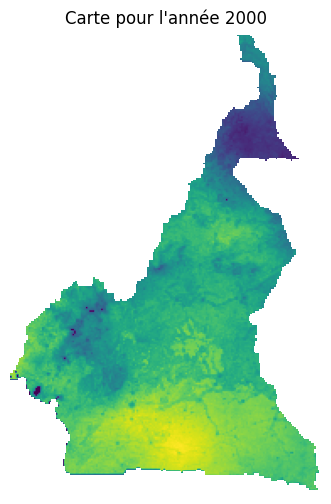

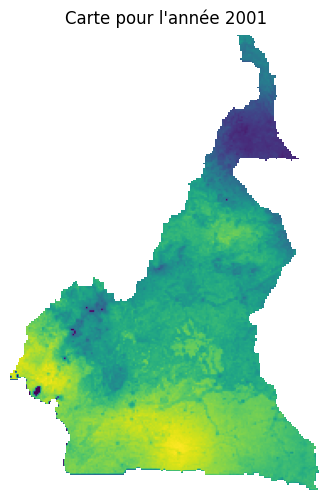

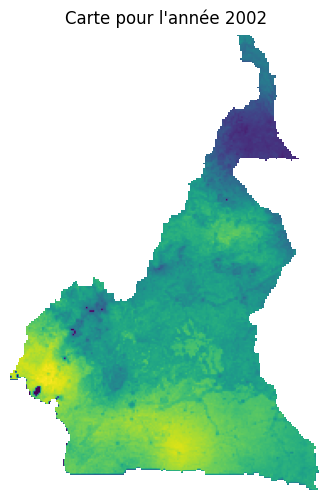

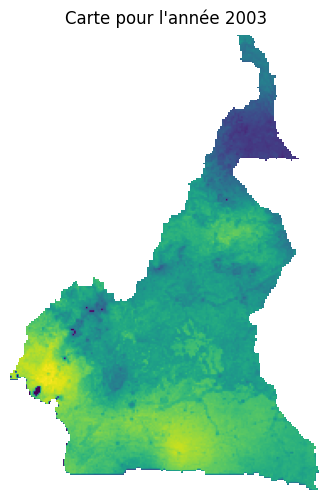

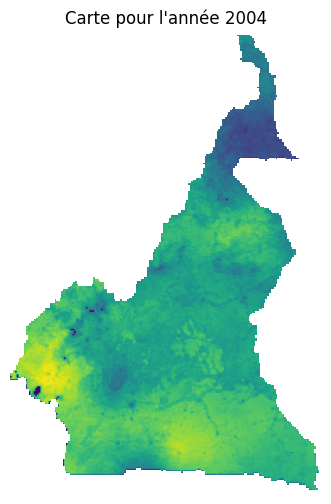

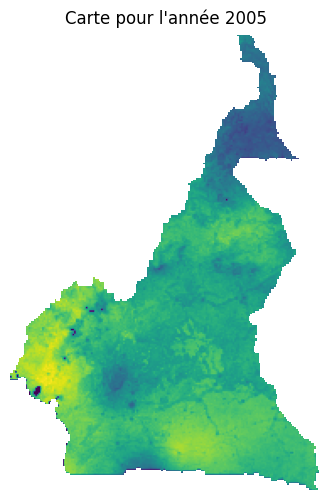

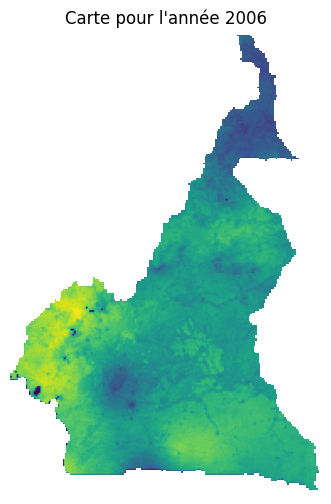

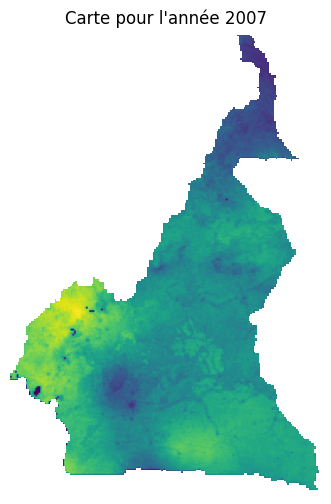

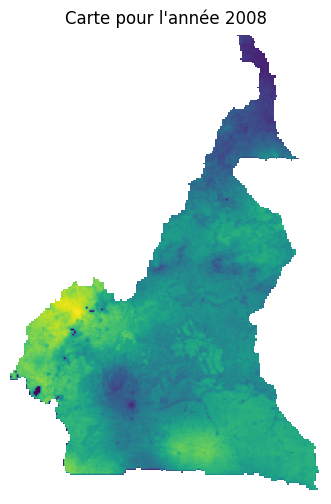

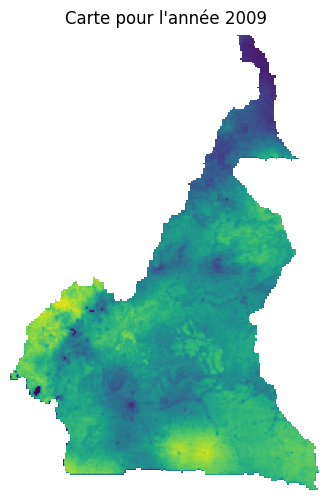

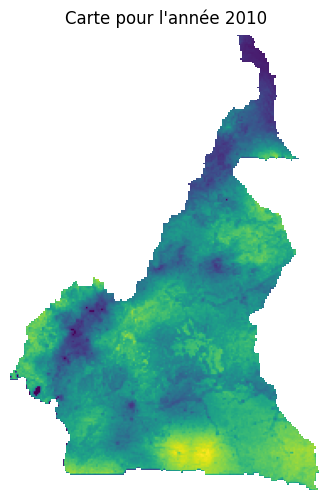

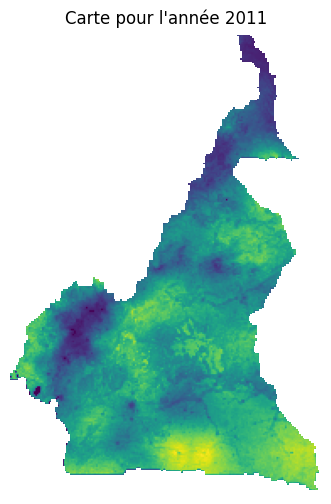

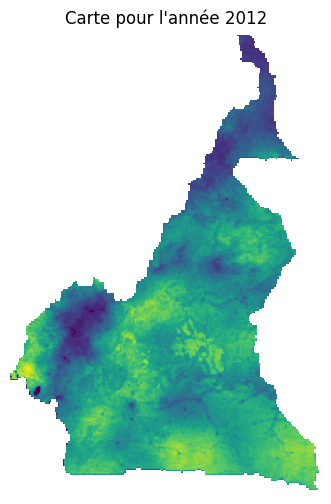

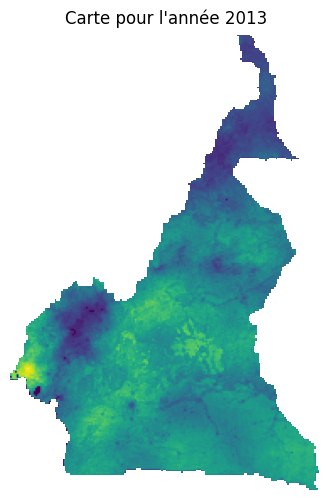

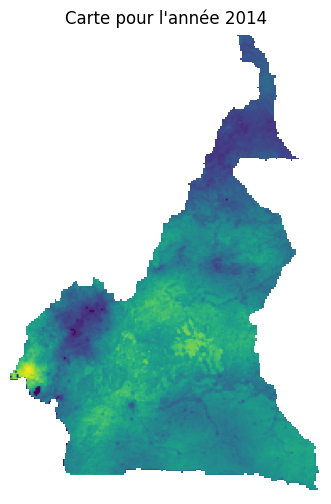

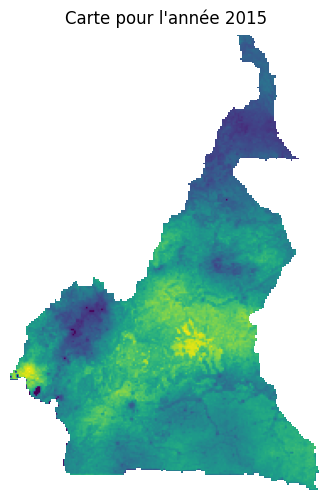

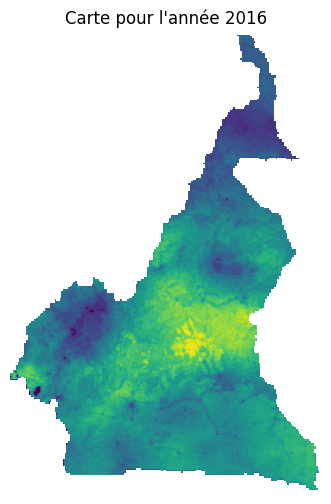

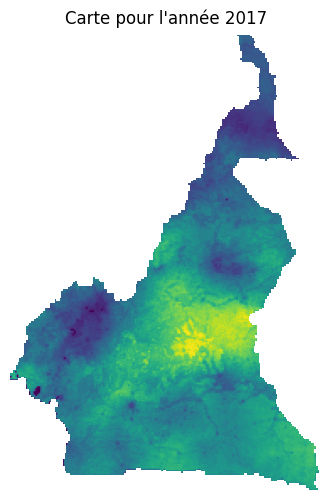

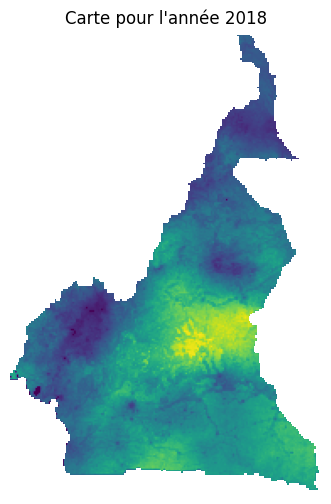

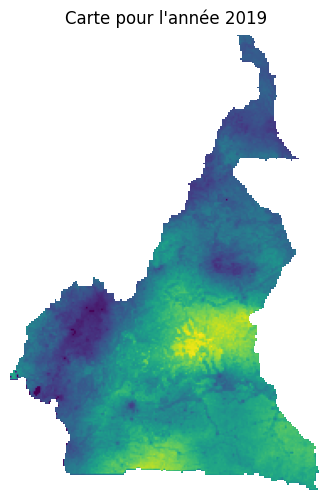

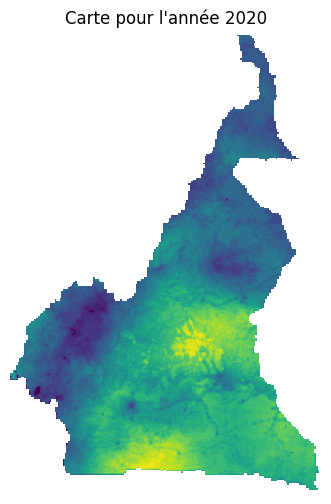

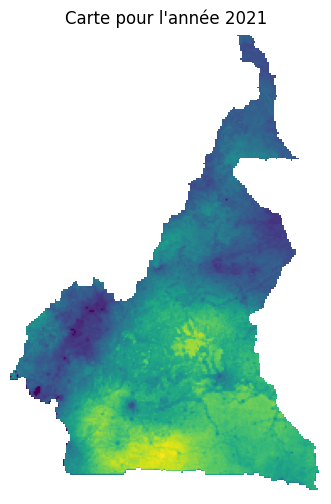

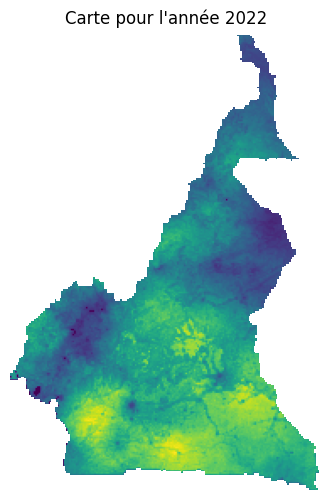

In [16]:
# Appeler la fonction pour visualiser les rasters
visualiser_rasters(tiff_files)

### Pourquoi ne pas faire une petite animation ? Amusons-nous un peu !

In [18]:
from PIL import Image
def create_gif(image_paths, output_gif_path, duration=150):
 images = [Image.open(image_path) for image_path in image_paths]
# Save as GIF
 images[0].save(
 output_gif_path,
 save_all=True,
 append_images=images[1:],
 duration=duration,
 loop=0 # 0 means infinite loop
 )

In [19]:
 # List of image file paths
 image_paths = [
    'carte_{}.png'.format(i)
    for i in range(2000, 2023)
] # Add your file paths
# Output GIF path
 output_gif_path = "output.gif"
# Create GIF
 create_gif(image_paths, output_gif_path)

print(f"GIF created and saved at {output_gif_path}")

GIF created and saved at output.gif


In [ ]:
from IPython.display import Image as IPImage, display
display(IPImage(filename=output_gif_path, width= 400))

<h2 style="text-align:center; background-color:RGB(51,165,182);font-size:45px;font-family:Algerian"> Opérations sur les images </h2>

In [44]:
# Lire les rasters et les empiler dans un tableau numpy
rasters = []
for fichier in tiff_files :
    with rasterio.open(fichier) as src:
        rasters.append(src.read(1))  # Lire la première bande

In [49]:
rasters

[array([[-9.999000e+03, -9.999000e+03, -9.999000e+03, ..., -9.999000e+03,
         -9.999000e+03, -9.999000e+03],
        [-9.999000e+03, -9.999000e+03, -9.999000e+03, ..., -9.999000e+03,
         -9.999000e+03, -9.999000e+03],
        [-9.999000e+03, -9.999000e+03, -9.999000e+03, ..., -9.999000e+03,
         -9.999000e+03, -9.999000e+03],
        ...,
        [-9.999000e+03, -9.999000e+03, -9.999000e+03, ...,  6.130913e-01,
         -9.999000e+03, -9.999000e+03],
        [-9.999000e+03, -9.999000e+03, -9.999000e+03, ..., -9.999000e+03,
         -9.999000e+03, -9.999000e+03],
        [-9.999000e+03, -9.999000e+03, -9.999000e+03, ..., -9.999000e+03,
         -9.999000e+03, -9.999000e+03]], dtype=float32),
 array([[-9.9990000e+03, -9.9990000e+03, -9.9990000e+03, ...,
         -9.9990000e+03, -9.9990000e+03, -9.9990000e+03],
        [-9.9990000e+03, -9.9990000e+03, -9.9990000e+03, ...,
         -9.9990000e+03, -9.9990000e+03, -9.9990000e+03],
        [-9.9990000e+03, -9.9990000e+03, -9.99

In [51]:
# Convertir la liste en tableau numpy 3D (nombre de rasters, hauteur, largeur)
rasters_array = np.array(rasters)
print(rasters_array.shape)

(23, 274, 185)


In [67]:
# Remplacer les valeurs -9999 par NaN
rasters_array = np.where(rasters_array == -9999, np.nan, rasters_array)


# Remplacer les valeurs -9999 par NaN
rasters_array = np.where(rasters_array == -9999, np.nan, rasters_array)

# Calculer les statistiques en ignorant les NaN
moyenne = np.nanmean(rasters_array, axis=0)
moyenne = np.nan_to_num(moyenne, nan=-9999)  # Remplacer les NaN par -9999

ecart_type = np.nanstd(rasters_array, axis=0)
ecart_type = np.nan_to_num(ecart_type, nan=-9999)  # Remplacer les NaN par -9999

minimum = np.nanmin(rasters_array, axis=0)
minimum = np.nan_to_num(minimum, nan=-9999)  # Remplacer les NaN par -9999

maximum = np.nanmax(rasters_array, axis=0)
maximum = np.nan_to_num(maximum, nan=-9999)  # Remplacer les NaN par -9999

mediane = np.nanmedian(rasters_array, axis=0)
mediane = np.nan_to_num(maximum, nan=-9999)  # Remplacer les NaN par -9999


C:\Users\DELL\AppData\Local\Temp\ipykernel_2468\522176248.py:9: RuntimeWarning: Mean of empty slice
  moyenne = np.nanmean(rasters_array, axis=0)
C:\Users\DELL\AppData\Local\Temp\ipykernel_2468\522176248.py:15: RuntimeWarning: All-NaN slice encountered
  minimum = np.nanmin(rasters_array, axis=0)
C:\Users\DELL\AppData\Local\Temp\ipykernel_2468\522176248.py:18: RuntimeWarning: All-NaN slice encountered
  maximum = np.nanmax(rasters_array, axis=0)
C:\Users\DELL\AppData\Local\Temp\ipykernel_2468\522176248.py:21: RuntimeWarning: All-NaN slice encountered
  mediane = np.nanmedian(rasters_array, axis=0)


In [68]:
moyenne

array([[-9.9990000e+03, -9.9990000e+03, -9.9990000e+03, ...,
        -9.9990000e+03, -9.9990000e+03, -9.9990000e+03],
       [-9.9990000e+03, -9.9990000e+03, -9.9990000e+03, ...,
        -9.9990000e+03, -9.9990000e+03, -9.9990000e+03],
       [-9.9990000e+03, -9.9990000e+03, -9.9990000e+03, ...,
        -9.9990000e+03, -9.9990000e+03, -9.9990000e+03],
       ...,
       [-9.9990000e+03, -9.9990000e+03, -9.9990000e+03, ...,
         4.8753688e-01, -9.9990000e+03, -9.9990000e+03],
       [-9.9990000e+03, -9.9990000e+03, -9.9990000e+03, ...,
        -9.9990000e+03, -9.9990000e+03, -9.9990000e+03],
       [-9.9990000e+03, -9.9990000e+03, -9.9990000e+03, ...,
        -9.9990000e+03, -9.9990000e+03, -9.9990000e+03]], dtype=float32)

### Fonction pour enregistrer un raster avec les statistiques calculées

In [ ]:
def enregistrer_raster(output_path, array, reference_file):
    with rasterio.open(reference_file) as src:
        profil = src.profile
        profil.update(dtype=rasterio.float32, count=1)

        with rasterio.open(output_path, 'w', **profil) as dst:
            dst.write(array.astype(rasterio.float32), 1)

**Paramètres de la fonction :**
- `output_path` : Le chemin du fichier de sortie où le nouveau raster sera enregistré.
- `array` : Le tableau numpy contenant les données à enregistrer (les statistiques calculées, par exemple).
- `reference_file` : Le fichier raster de référence qui sera utilisé pour récupérer les métadonnées (comme la taille, la résolution, la transformation affine, et le 

In [91]:

# Enregistrer les rasters de sortie
enregistrer_raster('moyenne.tif', moyenne, tiff_files[0])
enregistrer_raster('ecart_type.tif', ecart_type, tiff_files[0])
enregistrer_raster('minimum.tif', minimum, tiff_files[0])
enregistrer_raster('maximum.tif', maximum, tiff_files[0])
enregistrer_raster('mediane.tif', maximum, tiff_files[0])

outputs=['moyenne.tif', 'ecart_type.tif', 'minimum.tif','maximum.tif', 'mediane.tif']

print("Les rasters de statistiques ont été enregistrés avec succès.")

Les rasters de statistiques ont été enregistrés avec succès.


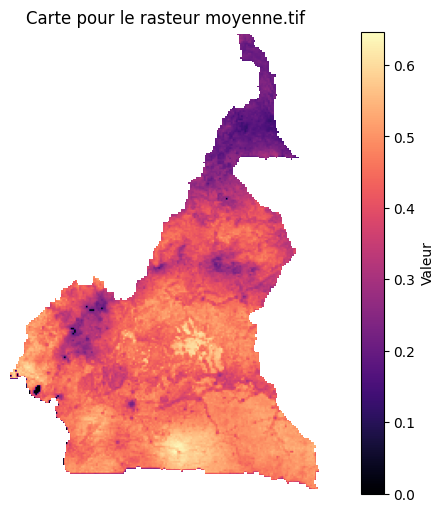

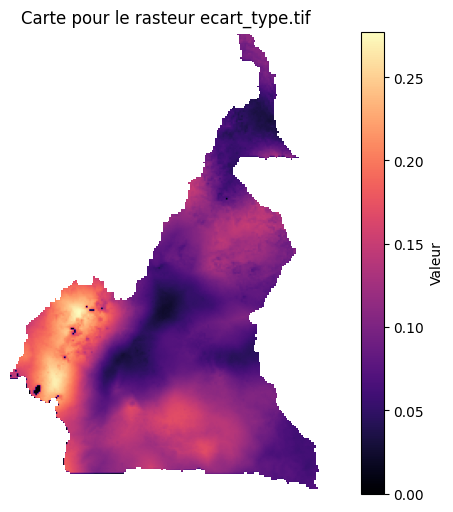

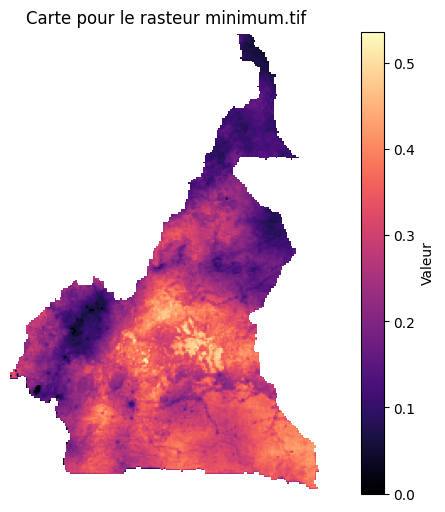

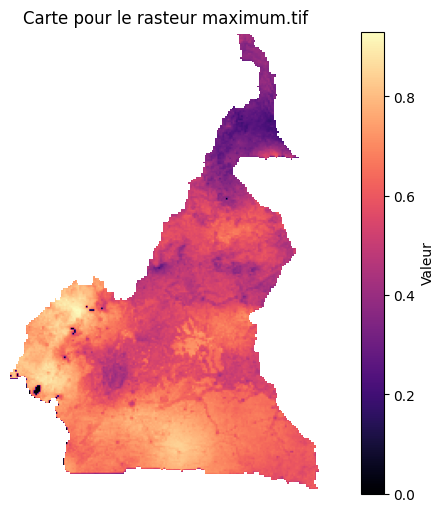

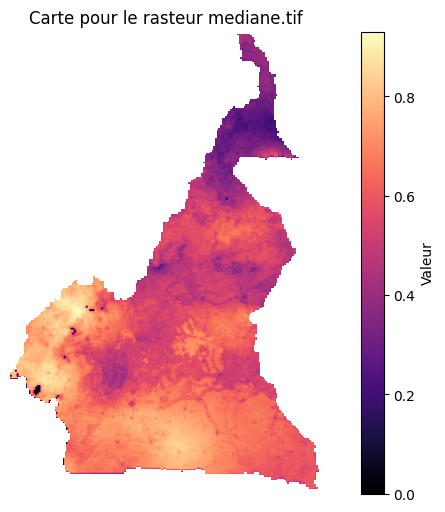

In [98]:
for file in outputs :
        with rasterio.open(file) as src:
            image = src.read(1)
            
            # Appliquer un masque pour les valeurs négatives ou aberrantes
            image = np.ma.masked_where(image == nodata, image)
            
            plt.figure(figsize=(10, 6))
            plt.imshow(image, cmap='magma')
            plt.colorbar(label='Valeur')
            plt.title("Carte pour le rasteur {}". format(file))
            plt.axis('off')  # Masquer les axes
            plt.show()

<!-- .element: class="fragment" -->

____________________________________

_



In [21]:
import folium
import rasterio
from folium.raster_layers import ImageOverlay
from rasterio.plot import reshape_as_image

# Chemin vers le fichier raster
raster_path = tiff_file

# Charger l'image raster
with rasterio.open(raster_path) as src:
    # Lire les données de l'image
    image = reshape_as_image(src.read())
    # Extraire les coordonnées géographiques de l'image raster
    bounds = src.bounds
    # Obtenir les coins de l'image (gauche, bas, droite, haut)
    bottom_left = [bounds.bottom, bounds.left]
    top_right = [bounds.top, bounds.right]

# Créer la carte Folium centrée sur la zone de l'image raster
m = folium.Map(location=[(bottom_left[0] + top_right[0]) / 2, (bottom_left[1] + top_right[1]) / 2], zoom_start=10)

# Ajouter l'image raster à la carte avec ImageOverlay
image_overlay = ImageOverlay(
    image=image,
    bounds=[[bottom_left[0], bottom_left[1]], [top_right[0], top_right[1]]],
    opacity=0.6,
    interactive=True,
    cross_origin=False
)

image_overlay.add_to(m)

# Afficher la carte
m.save("map_with_raster.html")
m


ValueError: Data must be NxM (mono), NxMx3 (RGB), or NxMx4 (RGBA)

<h1 style="text-align:center; background-color:RGB(255, 165, 0);font-size:35px;font-family:Algerian"> <br> Merci de votre attention <br> </h1>

________________________